# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Sep 27, 23:59 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Ashutosh Desai

Student ID: 1004774041

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.datasets import load_breast_cancer #importing dataset from Scikit learn
breast_cancer_dataset = load_breast_cancer() 
print(breast_cancer_dataset) #display the entire dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? 30
* What are the target classes? 0 1
* What do these target classes signify? 0-Malignant 1-Benign
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
#Part 1 - Question 1

feature_data = breast_cancer_dataset.data
feature_name = breast_cancer_dataset.feature_names
target_data = breast_cancer_dataset.target
target_name = breast_cancer_dataset.target_names

print("Number of features in the dataset = ",feature_name.size)
print("Target classes = ",set(target_data))
print("Target names = ",target_name)

malignant_number = np.sum(target_data==0) 
benign_number = np.sum(target_data==1)
print("Participants tested malignant = ",malignant_number)
print("Participants tested benign = ",benign_number)
print("") #spacing for presentation

df_breast_cancer = pd.DataFrame(feature_data , columns = feature_name) #creating Pandas Dataframe from the dataset https://stackoverflow.com/questions/44340445/loading-sklearn-cancer-dataset-into-pandas-dataframe/44340854
df_breast_cancer['target'] = target_data #adding the 'target column' to the dataframe
print(df_breast_cancer)

Number of features in the dataset =  30
Target classes =  {0, 1}
Target names =  ['malignant' 'benign']
Participants tested malignant =  212
Participants tested benign =  357

     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039     

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

**

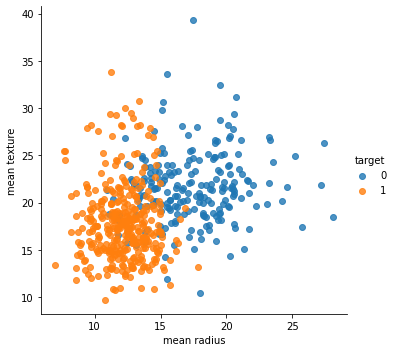

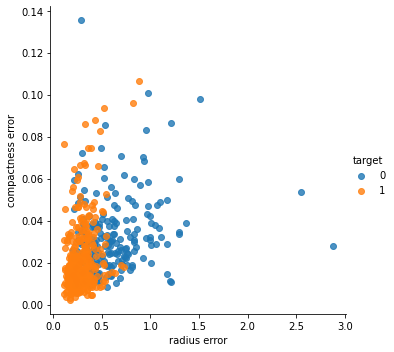

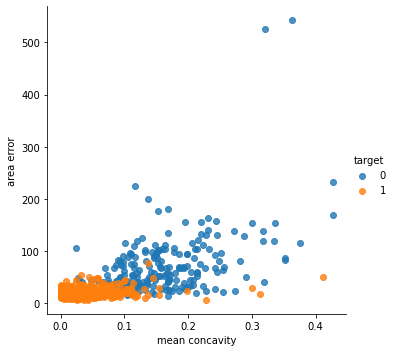

In [ ]:
#Part 1 - Question 2

import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x ='mean radius', y ='mean texture', fit_reg = False, hue = 'target', data = df_breast_cancer) #https://elitedatascience.com/python-seaborn-tutorial 
plt.show() #show the plot

sns.lmplot(x ='radius error', y ='compactness error', fit_reg = False, hue = 'target', data = df_breast_cancer) #https://elitedatascience.com/python-seaborn-tutorial 
plt.show() #show the plot

sns.lmplot(x ='mean concavity', y ='area error', fit_reg = False, hue = 'target', data = df_breast_cancer) #https://elitedatascience.com/python-seaborn-tutorial 
plt.show() #show the plot


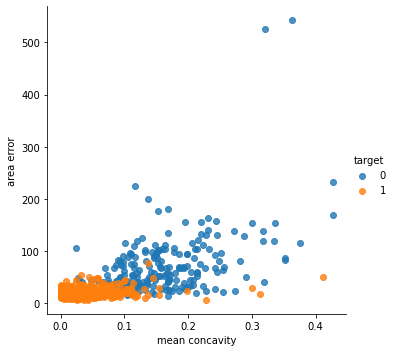

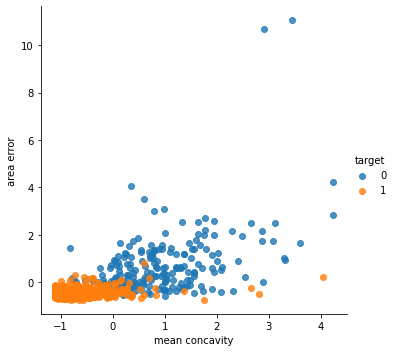

In [ ]:
#Part 1 - Question 3

sns.lmplot(x ='mean concavity', y ='area error', fit_reg = False, hue = 'target', data = df_breast_cancer) #https://elitedatascience.com/python-seaborn-tutorial 
plt.show() #show the plot

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(feature_data) #model learns how to scale based on the feature data
rescaled_data = scaler.transform(feature_data) #the feature data gets transformed

rescaled_data_df = pd.DataFrame(rescaled_data , columns = feature_name) #convert sklearn datasheet to pandas dataframe 
rescaled_data_df['target'] = target_data
#print(rescaled_data_df)

sns.lmplot(x ='mean concavity', y ='area error', fit_reg = False, hue = 'target', data = rescaled_data_df) #https://elitedatascience.com/python-seaborn-tutorial 
plt.show() #show the plot



The difference between the two plots are the values on the x-axis and y-axis. The feature data of 'area error' and the feature data of 'mean concavity' are of a different order. Standardization makes both the scales of the same order. This is done by transforming the feature data to center it by removing the mean value of each feature, then scaling it by dividing non-constant features by their standard deviation.

In [ ]:
#Part 1 - Question 4

from sklearn.model_selection import train_test_split
X = feature_data
Y = target_data
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0) #70:30 split of data
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]**
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]**



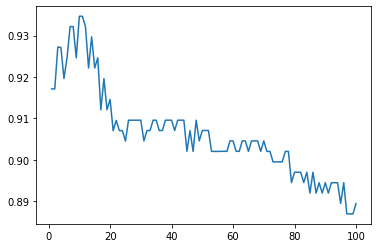

In [ ]:
#Part 2 - Question 1

from sklearn import neighbors #import nearest neighbor library from scikit learn
from sklearn.model_selection import cross_val_score

k_value = []
for i in range(1,101):
  k_value.append(i)

avg_accuracy = []

for i in k_value:
  knn = neighbors.KNeighborsClassifier(n_neighbors=i) #knn object creation
  knn.fit(X_train,Y_train)
  scores = cross_val_score(knn, X_train, Y_train, cv=5)
  mean_accuracy = scores.mean()
  avg_accuracy.append(mean_accuracy)

from matplotlib import pyplot as plt
plt.plot(k_value, avg_accuracy)

In [ ]:
#Part 2 - Question 2

max_acc = max(avg_accuracy)
#print(max_acc)
best_k = k_value[avg_accuracy.index(max_acc)] #https://stackoverflow.com/questions/11871241/python-find-x-value-to-corresponding-max-y-value-in-plot
#best_k
print("The maximum accuracy is %0.2f and the corresponding best k-value is %0.2f "%( max_acc*100, best_k))

The maximum accuracy is 93.47 and the corresponding best k-value is 10.00 


K-values for which the train data accuracy is **high** (here, from K=1 to K=15) and the test data accuracy is **low** are considered as **Overfit**.
K-values for which the train data accuracy is **low** (here, from K=85 to K=100) and the test data accuracy is **low** are considered as **Underfit**.

The k-value is 10.00 and the average accuracy is 93.47 
(398, 30)
The k-value is 10.00 and the average accuracy is 93.47 
(398, 29)
The k-value is 10.00 and the average accuracy is 89.19 
(398, 25)
The k-value is 10.00 and the average accuracy is 88.68 
(398, 15)
The k-value is 10.00 and the average accuracy is 87.43 
(398, 9)


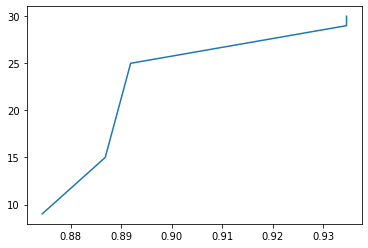

In [ ]:
#Part 2 - Question 3
#In this section, the k=value is 10 and the number features shall change

avg_accuracy2 = []

#Original data
from sklearn import neighbors #import nearest neighbor library from scikit learn
from sklearn.model_selection import cross_val_score

knn = neighbors.KNeighborsClassifier(n_neighbors=10) #knn object creation
knn.fit(X_train,Y_train)
scores = cross_val_score(knn, X_train, Y_train, cv=5)
mean_accuracy = scores.mean()
print("The k-value is %0.2f and the average accuracy is %0.2f "%(10,mean_accuracy*100))
print(X_train.shape)
avg_accuracy2.append(mean_accuracy)


#Eliminate 1 column
X1_train = np.delete(X_train,1,1)

knn = neighbors.KNeighborsClassifier(n_neighbors=10) #knn object creation
knn.fit(X1_train,Y_train)
scores = cross_val_score(knn, X1_train, Y_train, cv=5)
mean_accuracy = scores.mean()
print("The k-value is %0.2f and the average accuracy is %0.2f "%(10,mean_accuracy*100))
print(X1_train.shape)
avg_accuracy2.append(mean_accuracy)

#Eliminate 5 columns
X2_train = np.delete(X_train,[1,2,3,4,5],1)

knn = neighbors.KNeighborsClassifier(n_neighbors=10) #knn object creation
knn.fit(X1_train,Y_train)
scores = cross_val_score(knn, X2_train, Y_train, cv=5)
mean_accuracy = scores.mean()
print("The k-value is %0.2f and the average accuracy is %0.2f "%(10,mean_accuracy*100))
print(X2_train.shape)
avg_accuracy2.append(mean_accuracy)

#Eliminate 15 columns
X3_train = np.delete(X_train,[1,2,3,4,5,6,7,8,9,10,21,22,23,24,25],1)

knn = neighbors.KNeighborsClassifier(n_neighbors=10) #knn object creation
knn.fit(X1_train,Y_train)
scores = cross_val_score(knn, X3_train, Y_train, cv=5)
mean_accuracy = scores.mean()
print("The k-value is %0.2f and the average accuracy is %0.2f "%(10,mean_accuracy*100))
print(X3_train.shape)
avg_accuracy2.append(mean_accuracy)

#Eliminate 20 columns 
X3_train = np.delete(X_train,[1,2,3,4,5,6,7,8,9,10,21,22,23,24,25,15,16,17,18,19,20],1)

knn = neighbors.KNeighborsClassifier(n_neighbors=10) #knn object creation
knn.fit(X1_train,Y_train)
scores = cross_val_score(knn, X3_train, Y_train, cv=5)
mean_accuracy = scores.mean()
print("The k-value is %0.2f and the average accuracy is %0.2f "%(10,mean_accuracy*100))
print(X3_train.shape)
avg_accuracy2.append(mean_accuracy)

no_of_columns = [30,29,25,15,9]
#Graph plot
from matplotlib import pyplot as plt
plt.plot(avg_accuracy2, no_of_columns)

The plot shown above shows the change of average accuracy with respect to different number of features considered. Hence, the k-value is kept constant. According to the observation of the plot, all the features i.e. 30 shall be considered. 

Thus, from the findings of Part 2 - Question 2 & 3, we can conclude that the selected model shall have the **K value of 10** and comprise of **30 features**.

## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**


The maximum accuracy is 96.74 and the corresponding best k-value is 10.00 


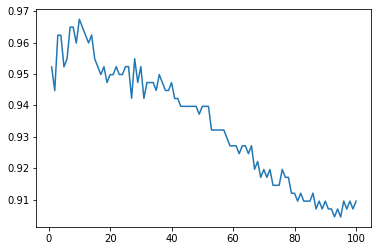

In [ ]:
#Part 3 - Question 1

from sklearn import neighbors #import nearest neighbor library from scikit learn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train)
X5_train = scaler.transform(X_train)
X5_train

k_value = []
for i in range(1,101):
  k_value.append(i)

avg_accuracy = []

for i in k_value:
  knn = neighbors.KNeighborsClassifier(n_neighbors=i) #knn object creation
  knn.fit(X5_train,Y_train)
  scores = cross_val_score(knn, X5_train, Y_train, cv=5)
  mean_accuracy = scores.mean()
  avg_accuracy.append(mean_accuracy)

from matplotlib import pyplot as plt
plt.plot(k_value, avg_accuracy)

max_acc = max(avg_accuracy)
#print(max_acc)
best_k = k_value[avg_accuracy.index(max_acc)]
#best_k
print("The maximum accuracy is %0.2f and the corresponding best k-value is %0.2f "%( max_acc*100, best_k))


####Part 3 - Question 2
Standardization shows a better performance. 
Model accuracy without standardiztion = 93.47%
Model accuracy with standardization = 96.74%

All feature data being of the same scale, makes it better for the validation data to validate the trained model.


## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

In [ ]:
#Part 4

from sklearn import neighbors #import nearest neighbor library from scikit learn
from sklearn.metrics import accuracy_score #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
knn = neighbors.KNeighborsClassifier(n_neighbors=10) #knn object creation
knn.fit(X5_train, Y_train)

scaler = StandardScaler().fit(X_train)
X1_test = scaler.transform(X_test)
#X1_test

accuracy = accuracy_score(Y_test, knn.predict(X1_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  95.90643274853801 %


The test accuracy is high and slightly lesser than the train accuracy which means its a Good fit. 
This also means that the model has been trained for all the classes through train data.

## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

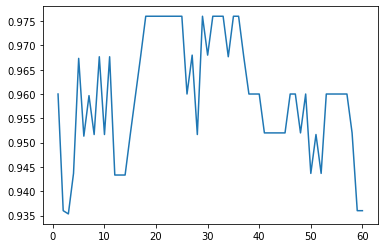

In [ ]:
#Part - 5
#Datasheet : Wine data

#
import pandas as pd
import numpy as np
import sklearn

from sklearn.datasets import load_wine
wine_dataset = load_wine()
print(wine_dataset)
print("")
print("")


##
feature_data = wine_dataset.data
feature_name = wine_dataset.feature_names
feature_name = np.array(feature_name)
target_data = wine_dataset.target
target_name = wine_dataset.target_names

print(feature_data.shape)
print(feature_name)
print(set(target_data))
print(target_name)

class_0 = np.sum(target_data==0)
class_1 = np.sum(target_data==1)
class_2 = np.sum(target_data==2)
print(class_0)
print(class_1)
print(class_2)
print("")
print("")


###
from sklearn.model_selection import train_test_split
X = feature_data
Y = target_data
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)
#print(X_train.size)
#print(X_test.size)
#print(Y_train)
#print(Y_test)
print("")
print("")


####
from sklearn import neighbors #import nearest neighbor library from scikit learn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train)
X5_train = scaler.transform(X_train)
#X5_train

k_value = []
for i in range(1,61):
  k_value.append(i)


avg_accuracy = []

for i in k_value:
  knn = neighbors.KNeighborsClassifier(n_neighbors=i) #knn object creation
  knn.fit(X5_train,Y_train)
  scores = cross_val_score(knn, X5_train, Y_train, cv=5)
  mean_accuracy = scores.mean()
  mean_accuracy
  avg_accuracy.append(mean_accuracy)

from matplotlib import pyplot as plt
plt.plot(k_value, avg_accuracy)

max_acc = max(avg_accuracy)
#print(max_acc)
best_k = k_value[avg_accuracy.index(max_acc)]
print("The maximum accuracy on training set is %0.2f and the corresponding best k-value is %0.2f "%( max_acc*100, best_k))
print("")
print("")


#####
from sklearn import neighbors #import nearest neighbor library from scikit learn
from sklearn.metrics import accuracy_score
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k) #knn object creation
knn.fit(X5_train, Y_train)

scaler = StandardScaler().fit(X_train)
X1_test = scaler.transform(X_test)
X1_test

accuracy = accuracy_score(Y_test, knn.predict(X1_test))
print ("Test set accuracy: ", accuracy * 100, "%")

### Wine-dataset results:
Best k-value = 18
Maximum training accuracy = 97.6%
Maximum testing accuracy = 100%

The accuracy results show that the model has been trained for datapoints that lie in a particular class zone and also for some data that might be out of the boundary of their respective class. Whereas, the testing data shall possess data which would be perfectly lying in the class specific region. Hence, the testing accuracy is more than the training accuracy.
